In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import math

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter

In [ ]:
df1 = pd.read_csv('/content/data_1_1.csv') 
df2 = pd.read_csv('/content/data_3_1.csv') 
df3 = pd.read_csv('/content/data_3_3.csv') 
df4 = pd.read_csv('/content/data_10_1.csv') 
df5 = pd.read_csv('/content/data_10_3.csv') 
df1.info() # посмотрим сколько признаков, есть ли пропущенные, а также их тип, распознан ли он правильно
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

In [ ]:
df1.describe()   

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000
mean,5.660811,6.404428,5.795032,7.290482,5.660808,6.404427,5.795028,7.290480,1112.050116,1114.851662
std,0.066009,0.074615,0.086633,0.079195,0.054315,0.058677,0.079671,0.071279,3.444639,4.385568
min,5.181000,5.944000,5.417000,6.917000,5.420000,6.174000,5.557000,7.080000,1101.821000,1103.304000
25%,5.617000,6.353000,5.726000,7.229000,5.620000,6.355000,5.728000,7.230000,1110.930000,1112.089000
50%,5.678000,6.403000,5.791000,7.271000,5.683000,6.402000,5.788000,7.269000,1112.951000,1115.845000
75%,5.706000,6.456000,5.862000,7.355000,5.702000,6.454000,5.862000,7.354000,1114.662000,1118.446000
max,6.128000,7.036000,6.316000,7.898000,5.851000,6.712000,6.059000,7.594000,1115.515000,1120.631000


In [ ]:
df2.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.00000,601000.000000,601000.000000,601000.000000
mean,5.572306,6.605890,5.685482,7.307183,5.572309,6.605893,5.68548,7.307180,1115.218973,1103.213705
std,0.064301,0.086101,0.097503,0.087153,0.046875,0.063904,0.08660,0.074574,4.407773,3.363114
min,5.177000,6.037000,5.222000,6.785000,5.346000,6.290000,5.43000,7.012000,1100.852000,1094.516000
25%,5.531000,6.557000,5.609000,7.243000,5.534000,6.563000,5.60900,7.244000,1112.894000,1101.021000
50%,5.572000,6.603000,5.684000,7.297000,5.572000,6.600000,5.68200,7.295000,1116.167000,1103.930000
75%,5.616000,6.661000,5.764000,7.372000,5.613000,6.656000,5.76100,7.371000,1118.718000,1105.971000
max,6.119000,7.388000,6.396000,8.131000,5.816000,6.952000,6.01800,7.679000,1120.780000,1107.761000


In [ ]:
df3.describe() 

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000
mean,5.341538,6.480604,5.813213,7.081811,5.341540,6.480605,5.813212,7.081816,1110.782978,1114.203987
std,0.078973,0.094716,0.067854,0.073858,0.064611,0.074330,0.051327,0.056906,4.660696,6.391466
min,4.902000,5.915000,5.377000,6.537000,5.117000,6.187000,5.604000,6.820000,1096.170000,1099.094000
25%,5.283000,6.413000,5.767000,7.032000,5.283000,6.414000,5.770000,7.033000,1109.458000,1109.634000
50%,5.335000,6.479000,5.815000,7.080000,5.335000,6.479000,5.815000,7.079000,1111.743000,1115.561000
75%,5.404000,6.549000,5.858000,7.130000,5.401000,6.547000,5.852000,7.128000,1114.095000,1119.648000
max,5.973000,7.396000,6.441000,7.806000,5.617000,6.851000,6.083000,7.421000,1115.729000,1122.749000


In [ ]:
df4.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000
mean,5.655099,6.436571,6.441841,7.106344,5.655101,6.436570,6.441841,7.106347,1111.292897,1110.829720
std,0.086149,0.088177,0.078644,0.082659,0.077636,0.074827,0.071751,0.073788,5.458128,4.082741
min,5.260000,5.948000,6.056000,6.660000,5.411000,6.165000,6.214000,6.872000,1098.129000,1100.982000
25%,5.583000,6.368000,6.376000,7.039000,5.583000,6.369000,6.376000,7.040000,1107.312000,1108.074000
50%,5.655000,6.438000,6.437000,7.104000,5.655000,6.439000,6.435000,7.103000,1112.987000,1111.708000
75%,5.729000,6.505000,6.506000,7.171000,5.728000,6.505000,6.505000,7.171000,1116.109000,1114.274000
max,6.188000,7.185000,7.025000,7.742000,5.920000,6.768000,6.725000,7.440000,1117.193000,1116.201000


In [ ]:
df5.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000
mean,5.633767,6.468462,6.448423,7.222061,5.633767,6.468461,6.448421,7.222060,1116.812809,1111.238145
std,0.091257,0.092039,0.087149,0.082834,0.082677,0.080415,0.081066,0.074469,6.719796,2.358751
min,5.208000,5.958000,6.008000,6.779000,5.403000,6.187000,6.212000,6.970000,1088.608000,1098.204000
25%,5.554000,6.393000,6.373000,7.151000,5.554000,6.393000,6.374000,7.152000,1115.431000,1110.798000
50%,5.634000,6.466000,6.463000,7.228000,5.634000,6.467000,6.463000,7.228000,1118.962000,1112.072000
75%,5.714000,6.544000,6.520000,7.289000,5.713000,6.544000,6.517000,7.291000,1121.407000,1112.665000
max,6.250000,7.216000,7.002000,7.821000,5.925000,6.803000,6.725000,7.543000,1123.404000,1113.247000


In [ ]:
df1.isna().mean()

Fluctuations_X_in_the_left_bearing            0.0
Fluctuations_Y_in_the_left_bearing            0.0
Fluctuations_X_in_the_right_bearing           0.0
Fluctuations_Y_in_the_right_bearing           0.0
Fluctuations_X_in_the_left_bearing_smooth     0.0
Fluctuations_Y_in_the_left_bearing_smooth     0.0
Fluctuations_X_in_the_right_bearing_smooth    0.0
Fluctuations_Y_in_the_right_bearing_smooth    0.0
Temperature_in_the_left_bearing               0.0
Temperature_in_the_right_bearing              0.0
dtype: float64

In [ ]:
df2.isna().mean()

Fluctuations_X_in_the_left_bearing            0.0
Fluctuations_Y_in_the_left_bearing            0.0
Fluctuations_X_in_the_right_bearing           0.0
Fluctuations_Y_in_the_right_bearing           0.0
Fluctuations_X_in_the_left_bearing_smooth     0.0
Fluctuations_Y_in_the_left_bearing_smooth     0.0
Fluctuations_X_in_the_right_bearing_smooth    0.0
Fluctuations_Y_in_the_right_bearing_smooth    0.0
Temperature_in_the_left_bearing               0.0
Temperature_in_the_right_bearing              0.0
dtype: float64

In [ ]:
df3.isna().mean()

Fluctuations_X_in_the_left_bearing            0.0
Fluctuations_Y_in_the_left_bearing            0.0
Fluctuations_X_in_the_right_bearing           0.0
Fluctuations_Y_in_the_right_bearing           0.0
Fluctuations_X_in_the_left_bearing_smooth     0.0
Fluctuations_Y_in_the_left_bearing_smooth     0.0
Fluctuations_X_in_the_right_bearing_smooth    0.0
Fluctuations_Y_in_the_right_bearing_smooth    0.0
Temperature_in_the_left_bearing               0.0
Temperature_in_the_right_bearing              0.0
dtype: float64

In [ ]:
df4.isna().mean()

Fluctuations_X_in_the_left_bearing            0.0
Fluctuations_Y_in_the_left_bearing            0.0
Fluctuations_X_in_the_right_bearing           0.0
Fluctuations_Y_in_the_right_bearing           0.0
Fluctuations_X_in_the_left_bearing_smooth     0.0
Fluctuations_Y_in_the_left_bearing_smooth     0.0
Fluctuations_X_in_the_right_bearing_smooth    0.0
Fluctuations_Y_in_the_right_bearing_smooth    0.0
Temperature_in_the_left_bearing               0.0
Temperature_in_the_right_bearing              0.0
dtype: float64

In [ ]:
df5.isna().mean()

Fluctuations_X_in_the_left_bearing            0.0
Fluctuations_Y_in_the_left_bearing            0.0
Fluctuations_X_in_the_right_bearing           0.0
Fluctuations_Y_in_the_right_bearing           0.0
Fluctuations_X_in_the_left_bearing_smooth     0.0
Fluctuations_Y_in_the_left_bearing_smooth     0.0
Fluctuations_X_in_the_right_bearing_smooth    0.0
Fluctuations_Y_in_the_right_bearing_smooth    0.0
Temperature_in_the_left_bearing               0.0
Temperature_in_the_right_bearing              0.0
dtype: float64

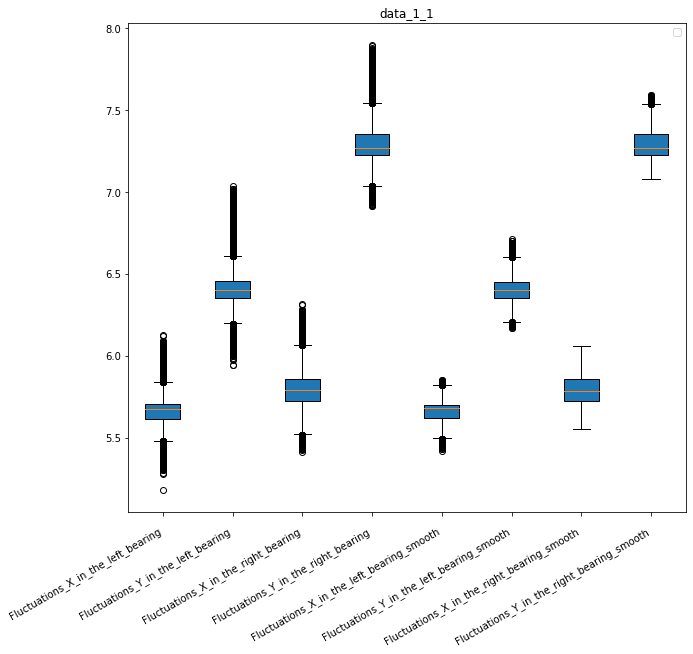

In [ ]:
plt.figure(figsize=(10, 10))

# create a bar chart of the mean values
plt.title('data_1_1')
plt.boxplot(df1.iloc[:, :-2].values, patch_artist=True,labels=df1.iloc[:, :-2].columns)

plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

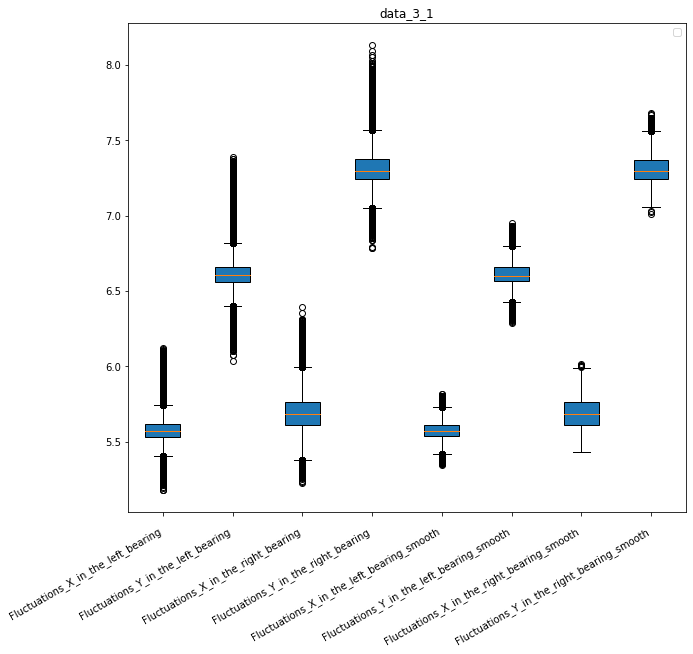

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_3_1')
plt.boxplot(df2.iloc[:, :-2].values, patch_artist=True,labels=df2.iloc[:, :-2].columns)

# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

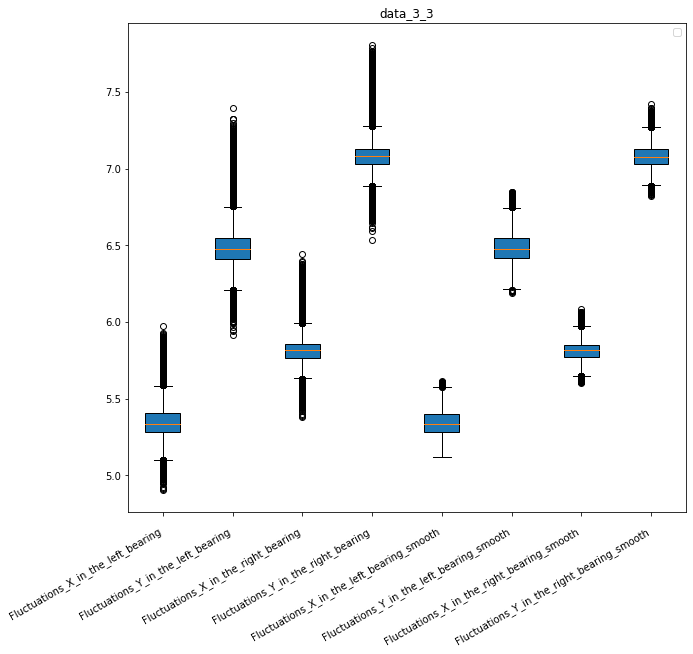

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_3_3')
plt.boxplot(df3.iloc[:, :-2].values, patch_artist=True,labels=df3.iloc[:, :-2].columns)

# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

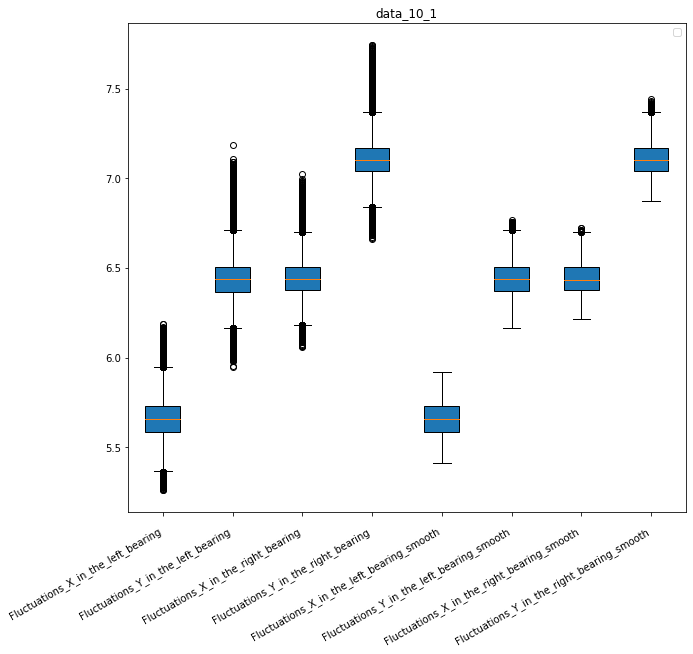

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_10_1')
plt.boxplot(df4.iloc[:, :-2].values, patch_artist=True,labels=df4.iloc[:, :-2].columns)

# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

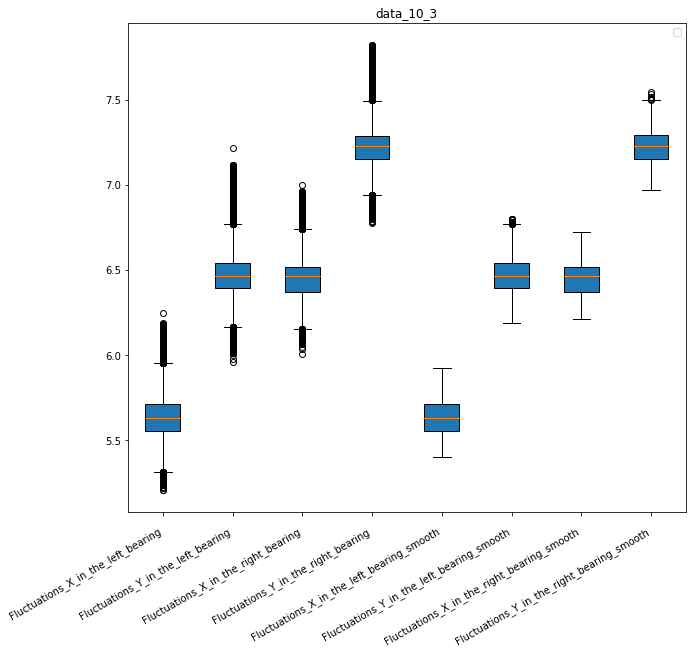

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_10_3')
plt.boxplot(df5.iloc[:, :-2].values, patch_artist=True,labels=df5.iloc[:, :-2].columns)

# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

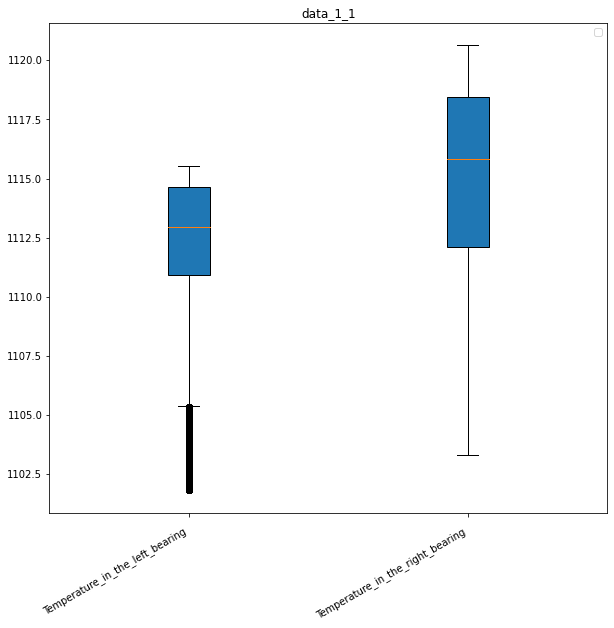

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_1_1')
plt.boxplot(df1.iloc[:, 8:].values, patch_artist=True,labels=df1.iloc[:, 8:].columns)
# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

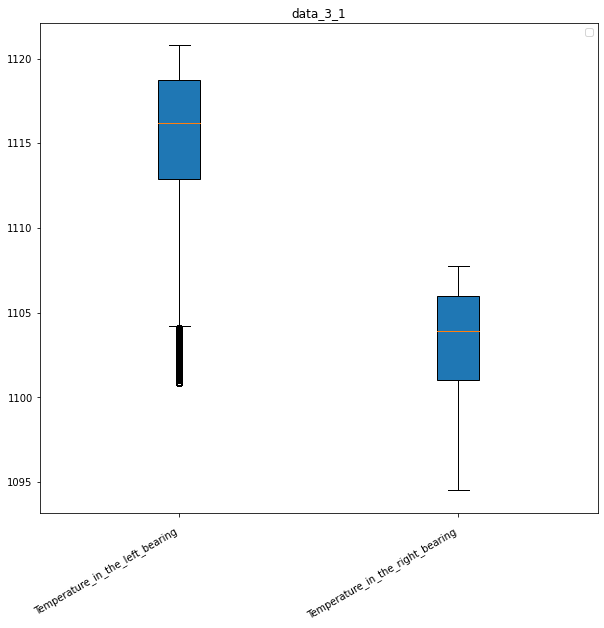

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_3_1')
plt.boxplot(df2.iloc[:, 8:].values, patch_artist=True,labels=df2.iloc[:, 8:].columns)
# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

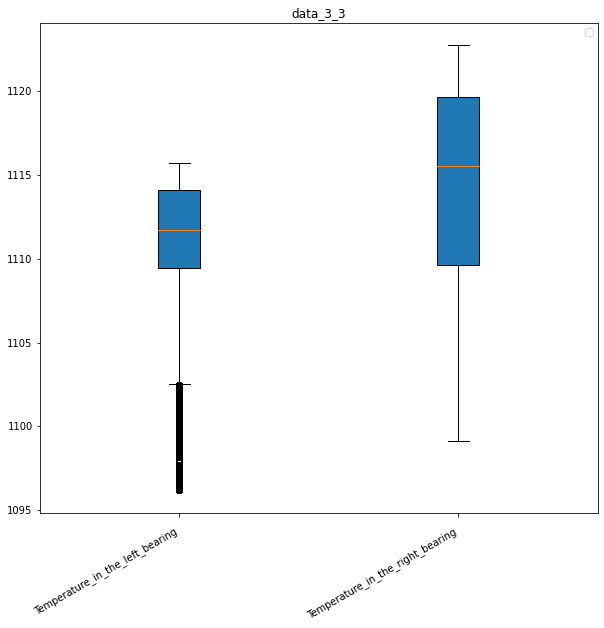

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_3_3')
plt.boxplot(df3.iloc[:, 8:].values, patch_artist=True,labels=df3.iloc[:, 8:].columns)
# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

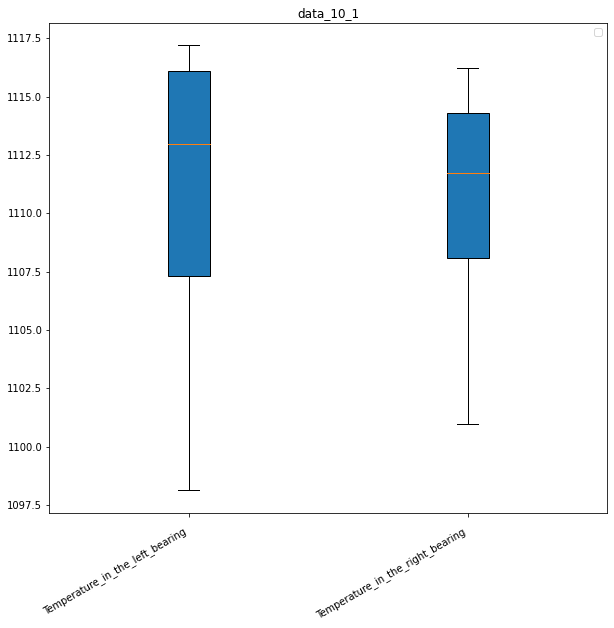

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_10_1')
plt.boxplot(df4.iloc[:, 8:].values, patch_artist=True,labels=df4.iloc[:, 8:].columns)
# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

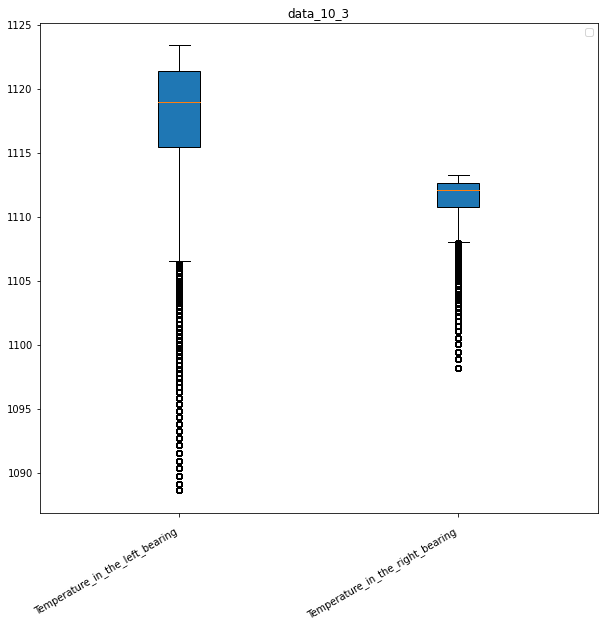

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('data_10_3')
plt.boxplot(df5.iloc[:, 8:].values, patch_artist=True,labels=df5.iloc[:, 8:].columns)
# rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_tick_params(pad=10)

# set the vertical alignment of the x-axis labels
plt.gcf().autofmt_xdate()
plt.legend()

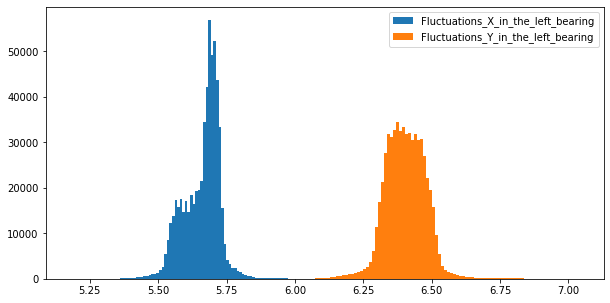

In [ ]:
plt.figure(figsize=(10, 5))
num_elements = list(range(1, len(df1['Fluctuations_X_in_the_left_bearing'])+1))
plt.hist(df1['Fluctuations_X_in_the_left_bearing'], bins = 100, label='Fluctuations_X_in_the_left_bearing')
plt.hist(df1['Fluctuations_Y_in_the_left_bearing'], bins = 100, label='Fluctuations_Y_in_the_left_bearing')

plt.legend()

<AxesSubplot:xlabel='Fluctuations_X_in_the_left_bearing', ylabel='Density'>

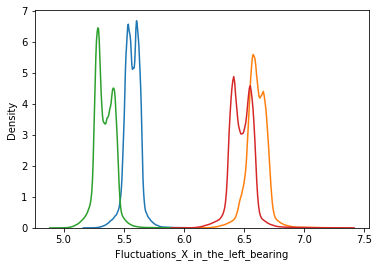

In [ ]:
sns.kdeplot(df2['Fluctuations_X_in_the_left_bearing'])
sns.kdeplot(df2['Fluctuations_Y_in_the_left_bearing'])
sns.kdeplot(df3['Fluctuations_X_in_the_left_bearing'])
sns.kdeplot(df3['Fluctuations_Y_in_the_left_bearing'])

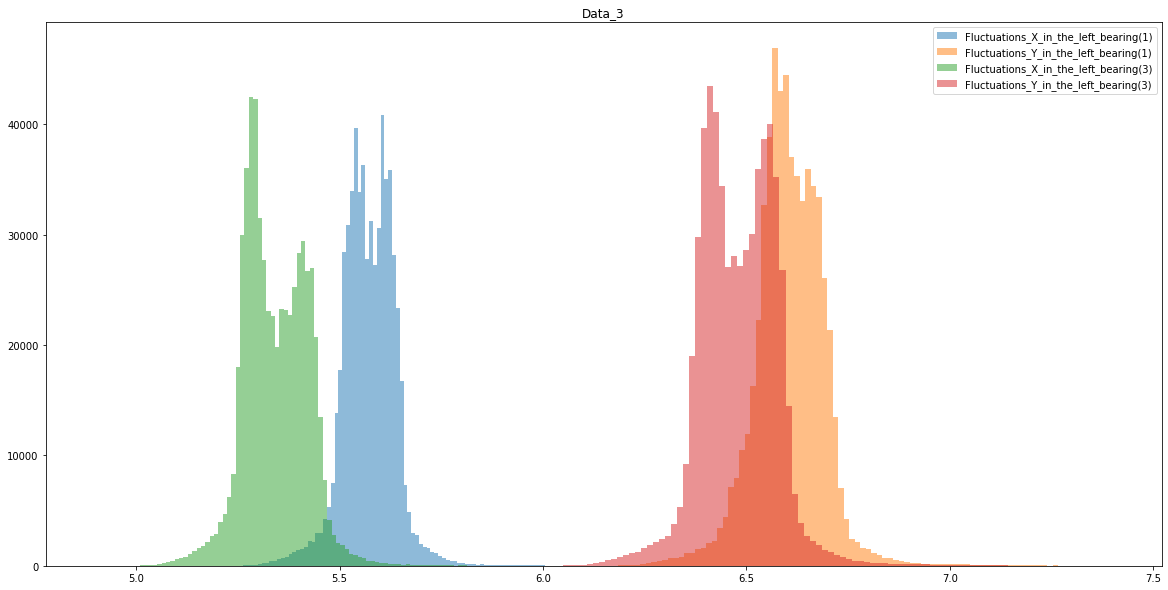

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df2['Fluctuations_X_in_the_left_bearing'])+1))
plt.hist(df2['Fluctuations_X_in_the_left_bearing'], bins = 100, label='Fluctuations_X_in_the_left_bearing(1)', alpha=0.5)
plt.hist(df2['Fluctuations_Y_in_the_left_bearing'], bins = 100, label='Fluctuations_Y_in_the_left_bearing(1)', alpha=0.5)
plt.hist(df3['Fluctuations_X_in_the_left_bearing'], bins = 100, label='Fluctuations_X_in_the_left_bearing(3)', alpha=0.5)
plt.hist(df3['Fluctuations_Y_in_the_left_bearing'], bins = 100, label='Fluctuations_Y_in_the_left_bearing(3)', alpha=0.5)

plt.title('Data_3')
# plt.grid(True)
plt.legend()

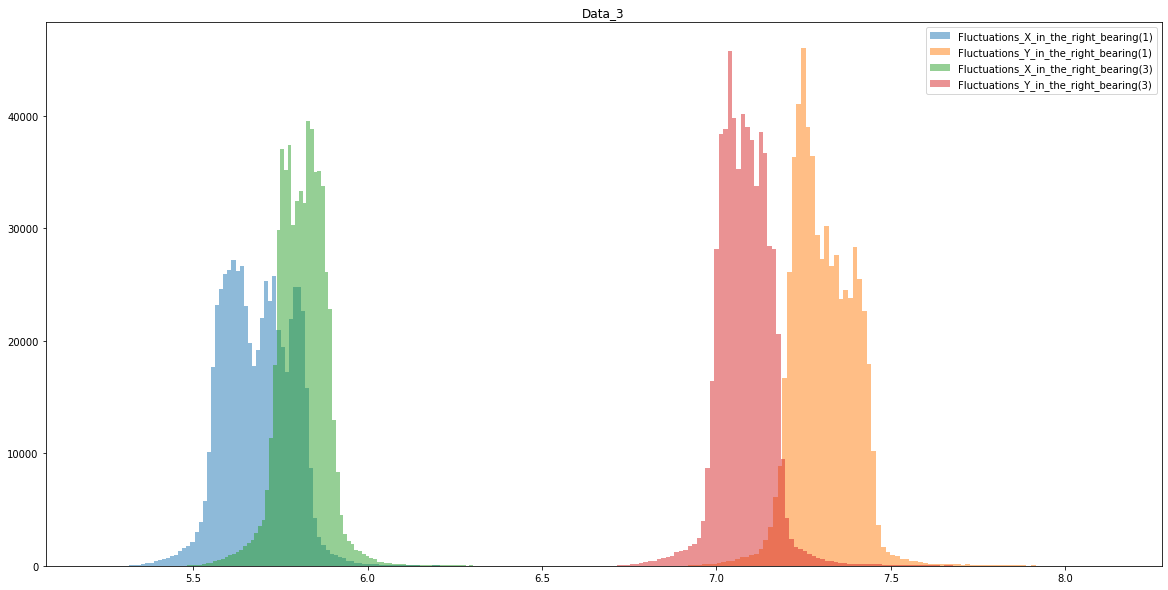

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df2['Fluctuations_X_in_the_right_bearing'])+1))
plt.hist(df2['Fluctuations_X_in_the_right_bearing'], bins = 100, label='Fluctuations_X_in_the_right_bearing(1)', alpha=0.5)
plt.hist(df2['Fluctuations_Y_in_the_right_bearing'], bins = 100, label='Fluctuations_Y_in_the_right_bearing(1)', alpha=0.5)
plt.hist(df3['Fluctuations_X_in_the_right_bearing'], bins = 100, label='Fluctuations_X_in_the_right_bearing(3)', alpha=0.5)
plt.hist(df3['Fluctuations_Y_in_the_right_bearing'], bins = 100, label='Fluctuations_Y_in_the_right_bearing(3)', alpha=0.5)

plt.title('Data_3')
# plt.grid(True)
plt.legend()

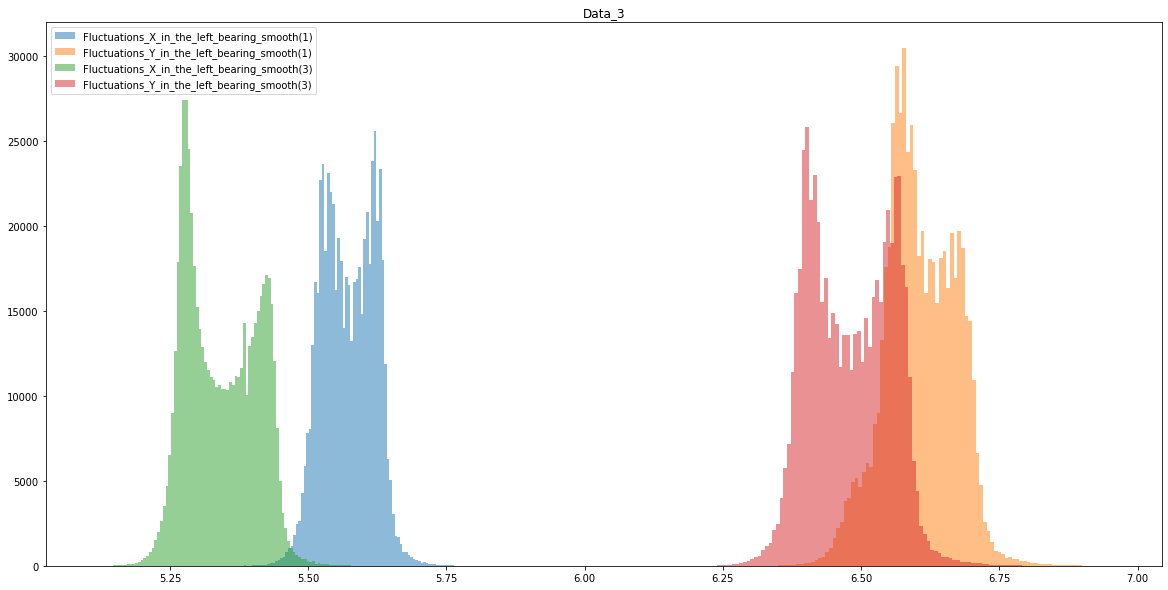

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df2['Fluctuations_X_in_the_left_bearing_smooth'])+1))
plt.hist(df2['Fluctuations_X_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_left_bearing_smooth(1)', alpha=0.5)
plt.hist(df2['Fluctuations_Y_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_left_bearing_smooth(1)', alpha=0.5)
plt.hist(df3['Fluctuations_X_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_left_bearing_smooth(3)', alpha=0.5)
plt.hist(df3['Fluctuations_Y_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_left_bearing_smooth(3)', alpha=0.5)

plt.title('Data_3')
# plt.grid(True)
plt.legend()

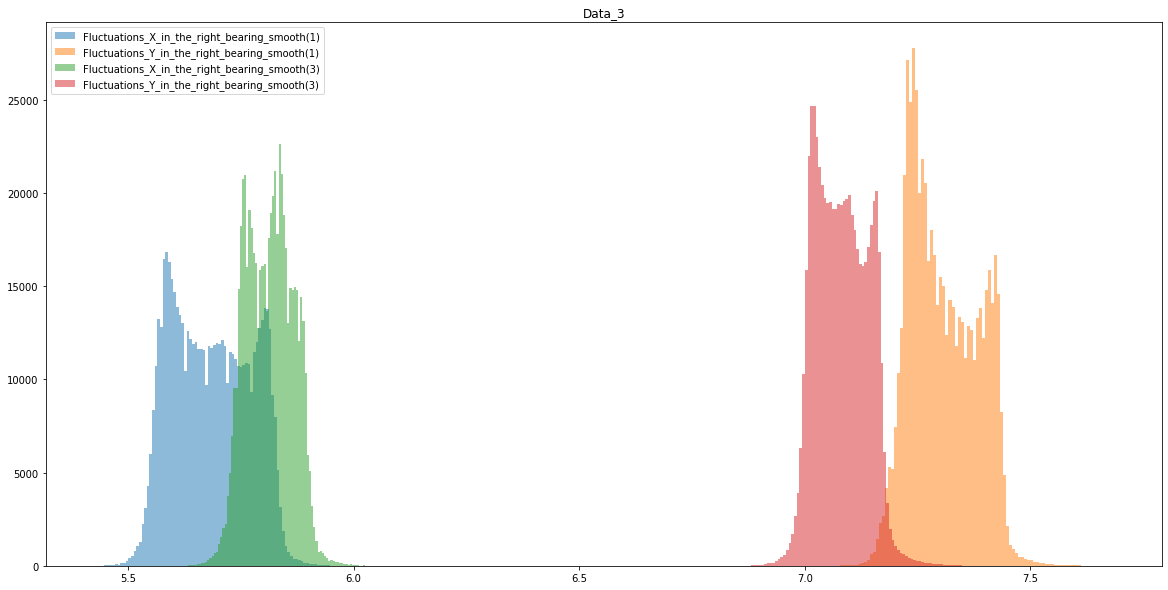

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df2['Fluctuations_X_in_the_right_bearing_smooth'])+1))
plt.hist(df2['Fluctuations_X_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_right_bearing_smooth(1)', alpha=0.5)
plt.hist(df2['Fluctuations_Y_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_right_bearing_smooth(1)', alpha=0.5)
plt.hist(df3['Fluctuations_X_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_right_bearing_smooth(3)', alpha=0.5)
plt.hist(df3['Fluctuations_Y_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_right_bearing_smooth(3)', alpha=0.5)

plt.title('Data_3')
# plt.grid(True)
plt.legend()

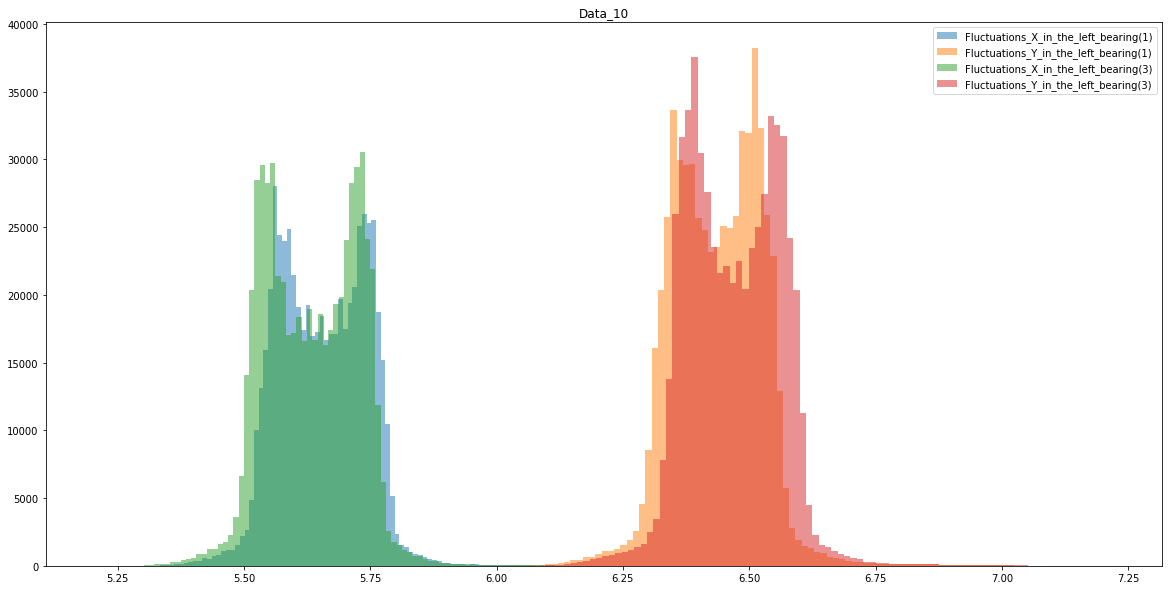

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df4['Fluctuations_X_in_the_left_bearing'])+1))
plt.hist(df4['Fluctuations_X_in_the_left_bearing'], bins = 100, label='Fluctuations_X_in_the_left_bearing(1)', alpha=0.5)
plt.hist(df4['Fluctuations_Y_in_the_left_bearing'], bins = 100, label='Fluctuations_Y_in_the_left_bearing(1)', alpha=0.5)
plt.hist(df5['Fluctuations_X_in_the_left_bearing'], bins = 100, label='Fluctuations_X_in_the_left_bearing(3)', alpha=0.5)
plt.hist(df5['Fluctuations_Y_in_the_left_bearing'], bins = 100, label='Fluctuations_Y_in_the_left_bearing(3)', alpha=0.5)

plt.title('Data_10')
# plt.grid(True)
plt.legend()

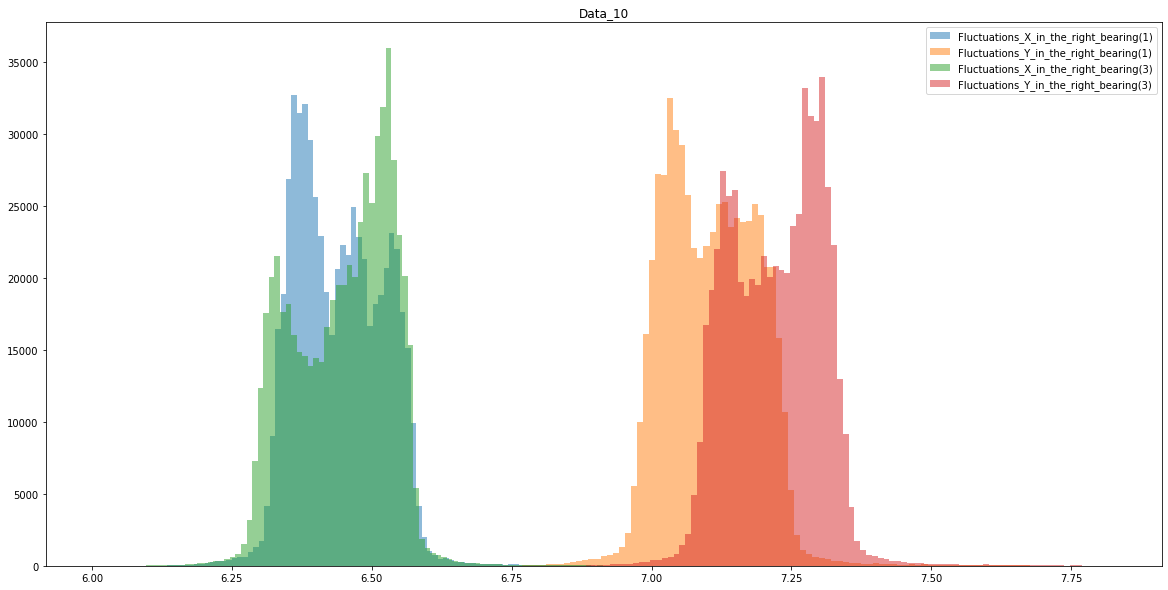

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df4['Fluctuations_X_in_the_right_bearing'])+1))
plt.hist(df4['Fluctuations_X_in_the_right_bearing'], bins = 100, label='Fluctuations_X_in_the_right_bearing(1)', alpha=0.5)
plt.hist(df4['Fluctuations_Y_in_the_right_bearing'], bins = 100, label='Fluctuations_Y_in_the_right_bearing(1)', alpha=0.5)
plt.hist(df5['Fluctuations_X_in_the_right_bearing'], bins = 100, label='Fluctuations_X_in_the_right_bearing(3)', alpha=0.5)
plt.hist(df5['Fluctuations_Y_in_the_right_bearing'], bins = 100, label='Fluctuations_Y_in_the_right_bearing(3)', alpha=0.5)

plt.title('Data_10')
# plt.grid(True)
plt.legend()

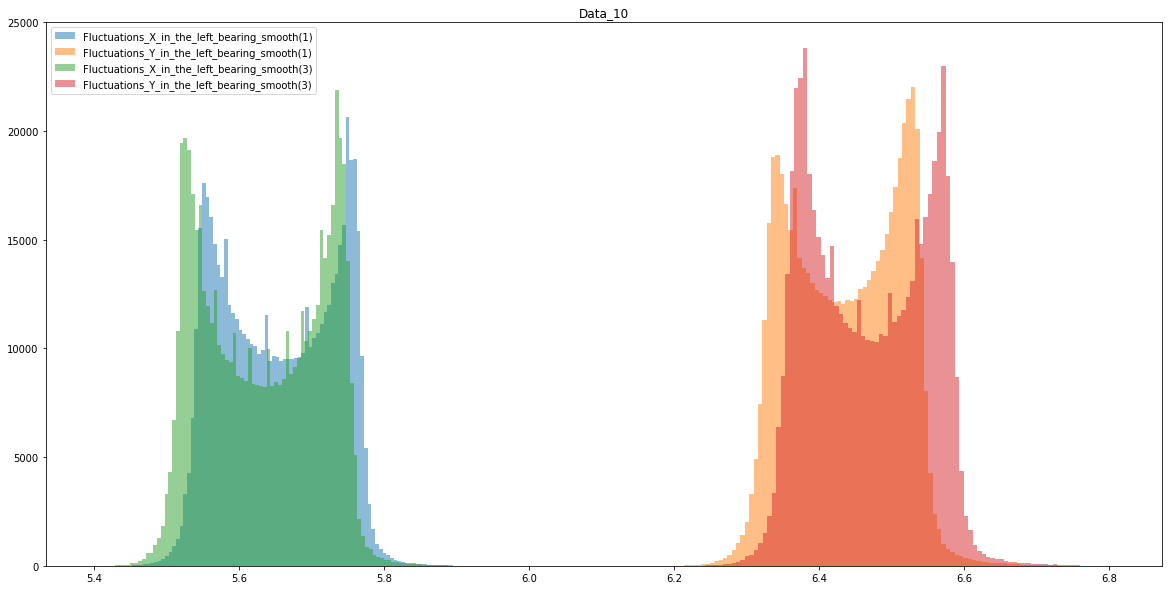

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df4['Fluctuations_X_in_the_left_bearing_smooth'])+1))
plt.hist(df4['Fluctuations_X_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_left_bearing_smooth(1)', alpha=0.5)
plt.hist(df4['Fluctuations_Y_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_left_bearing_smooth(1)', alpha=0.5)
plt.hist(df5['Fluctuations_X_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_left_bearing_smooth(3)', alpha=0.5)
plt.hist(df5['Fluctuations_Y_in_the_left_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_left_bearing_smooth(3)', alpha=0.5)

plt.title('Data_10')
# plt.grid(True)
plt.legend()

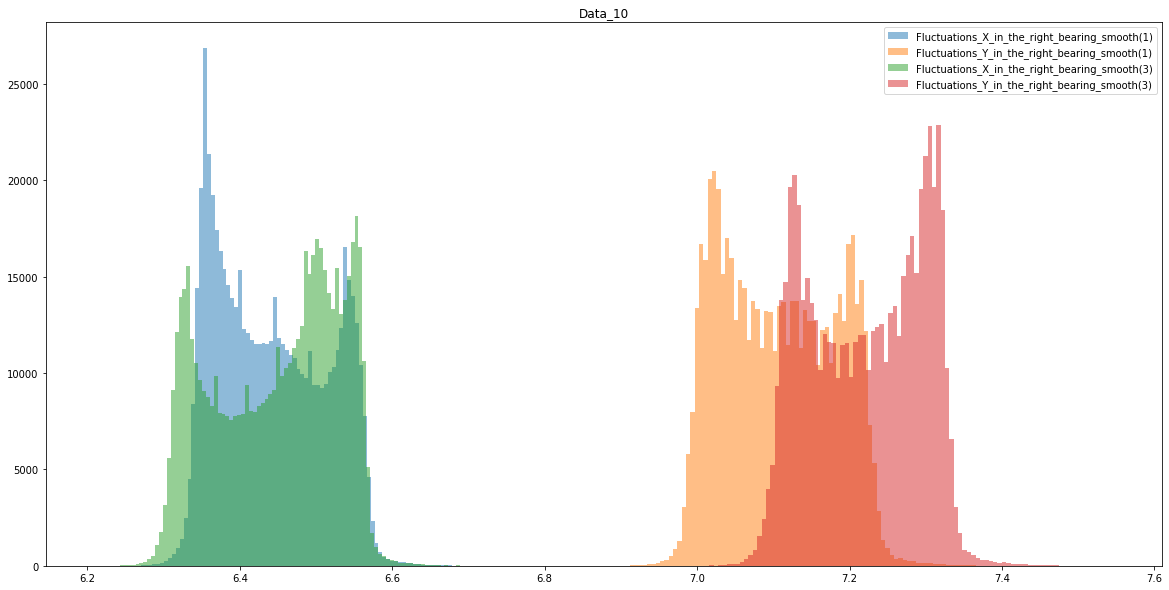

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df4['Fluctuations_X_in_the_right_bearing_smooth'])+1))
plt.hist(df4['Fluctuations_X_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_right_bearing_smooth(1)', alpha=0.5)
plt.hist(df4['Fluctuations_Y_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_right_bearing_smooth(1)', alpha=0.5)
plt.hist(df5['Fluctuations_X_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_X_in_the_right_bearing_smooth(3)', alpha=0.5)
plt.hist(df5['Fluctuations_Y_in_the_right_bearing_smooth'], bins = 100, label='Fluctuations_Y_in_the_right_bearing_smooth(3)', alpha=0.5)

plt.title('Data_10')
# plt.grid(True)
plt.legend()

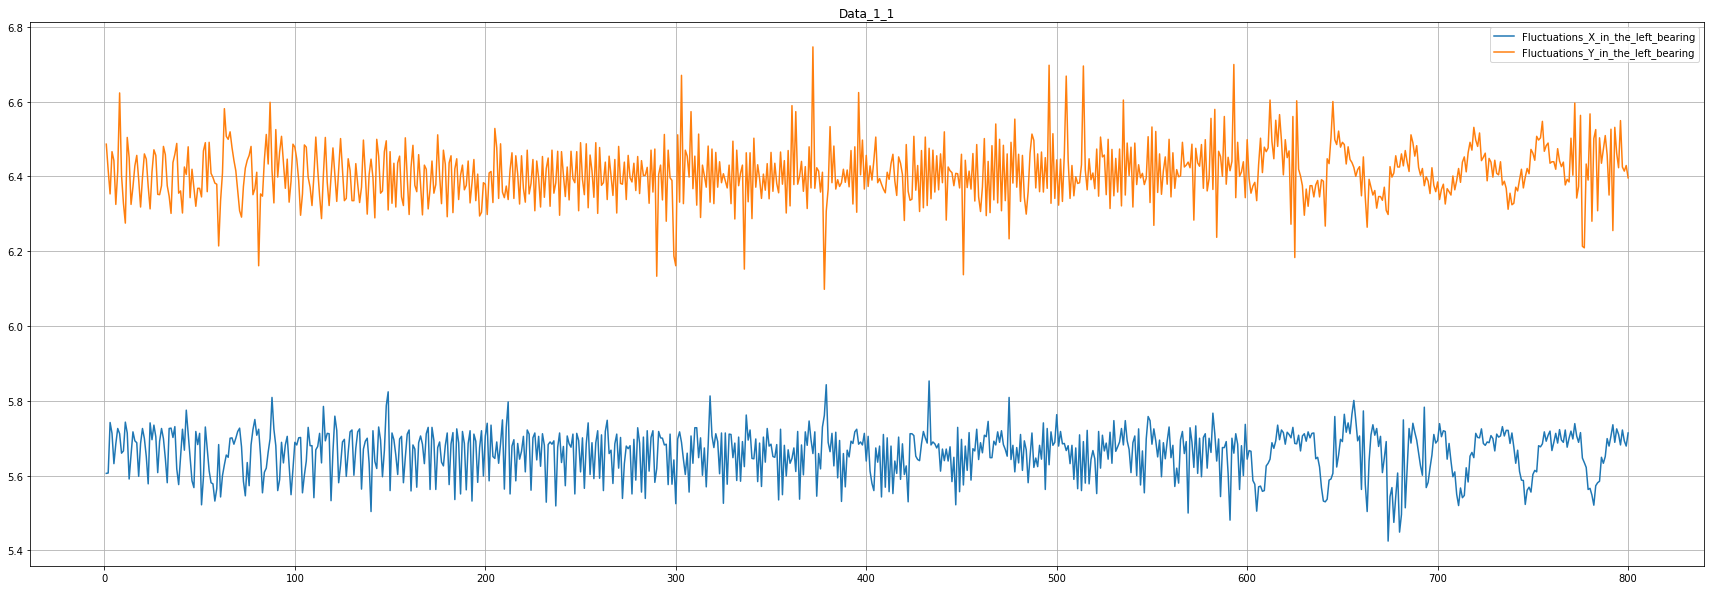

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df1['Fluctuations_X_in_the_left_bearing'][:800])+1))
plt.plot(num_elements, df1['Fluctuations_X_in_the_left_bearing'][:800], label='Fluctuations_X_in_the_left_bearing')
plt.plot(num_elements, df1['Fluctuations_Y_in_the_left_bearing'][:800], label='Fluctuations_Y_in_the_left_bearing')

plt.title('Data_1_1')
plt.grid(True)
plt.legend()

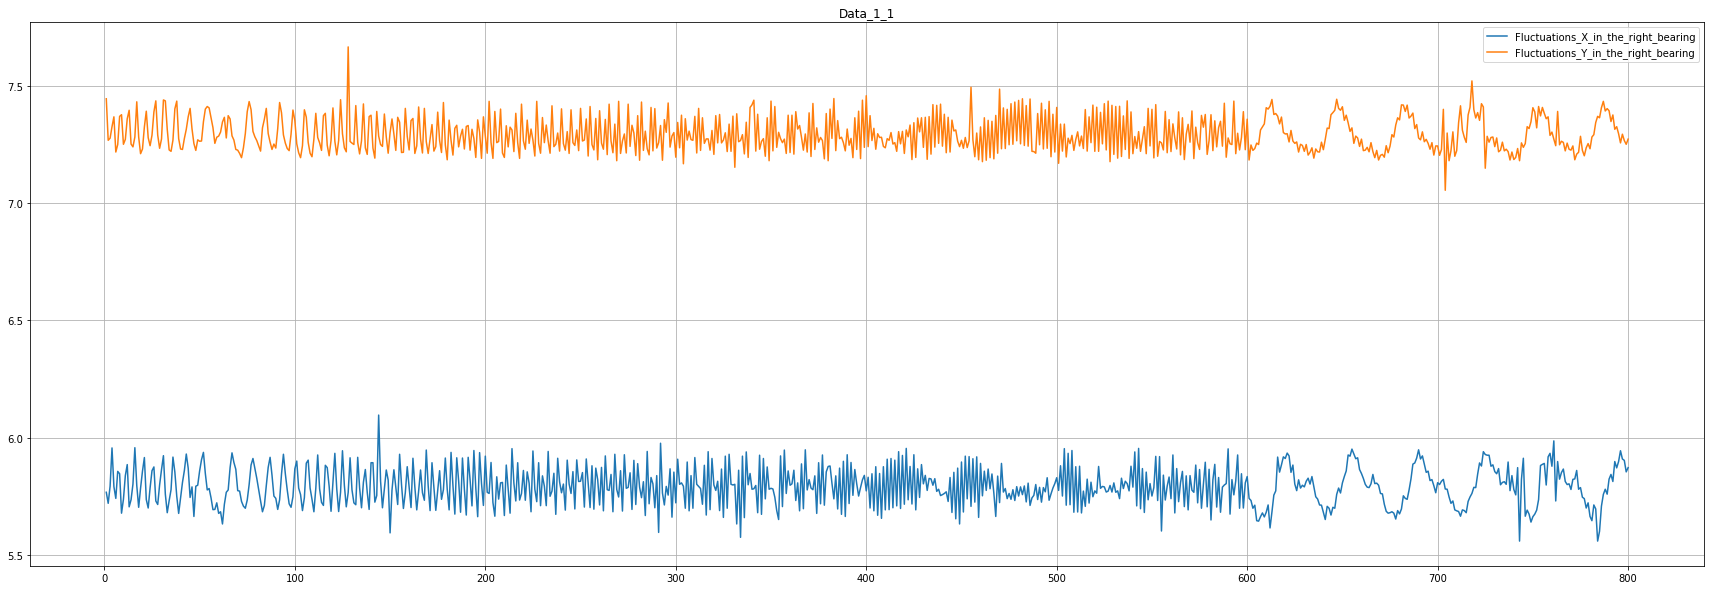

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df1['Fluctuations_X_in_the_right_bearing'][:800])+1))
plt.plot(num_elements, df1['Fluctuations_X_in_the_right_bearing'][:800], label='Fluctuations_X_in_the_right_bearing')
plt.plot(num_elements, df1['Fluctuations_Y_in_the_right_bearing'][:800], label='Fluctuations_Y_in_the_right_bearing')

plt.title('Data_1_1')
plt.grid(True)
plt.legend()

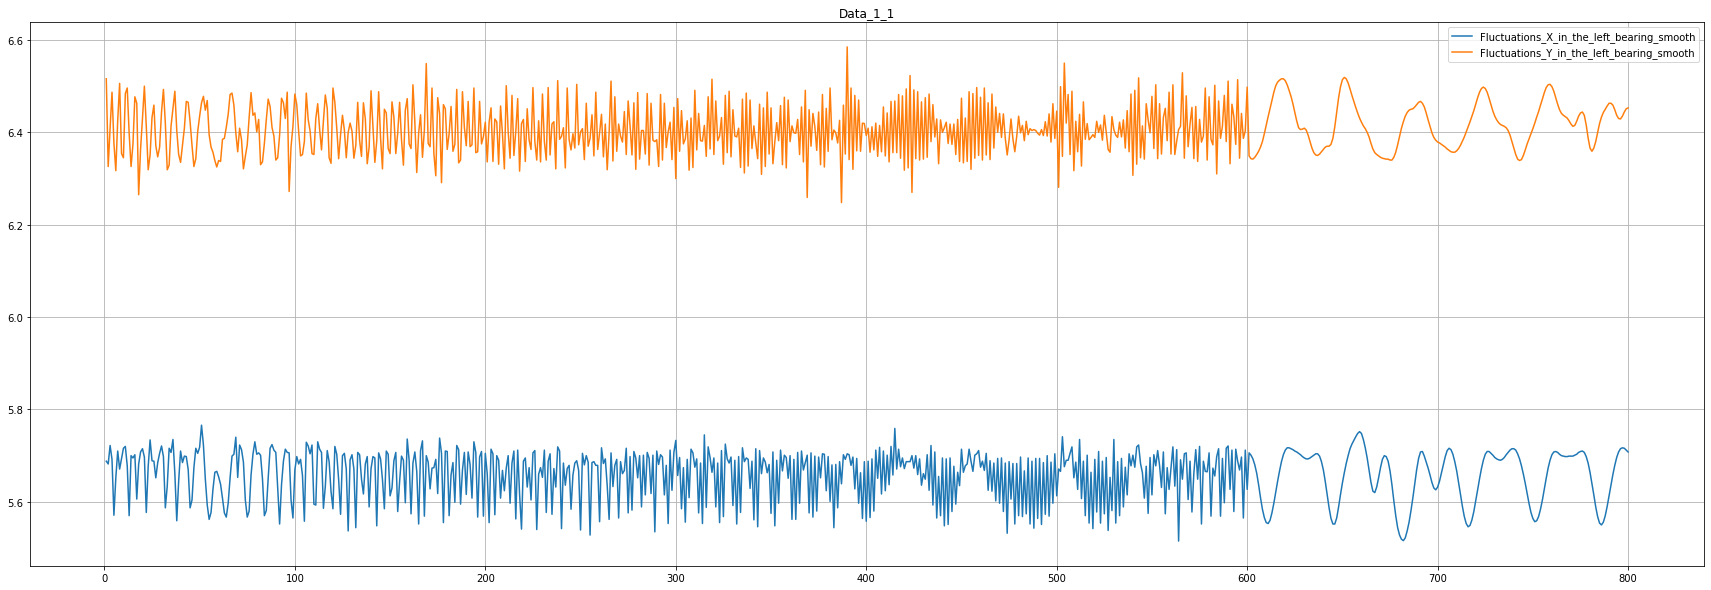

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df1['Fluctuations_X_in_the_left_bearing_smooth'][:800])+1))
plt.plot(num_elements, df1['Fluctuations_X_in_the_left_bearing_smooth'][:800], label='Fluctuations_X_in_the_left_bearing_smooth')
plt.plot(num_elements, df1['Fluctuations_Y_in_the_left_bearing_smooth'][:800], label='Fluctuations_Y_in_the_left_bearing_smooth')

plt.title('Data_1_1')
plt.grid(True)
plt.legend()

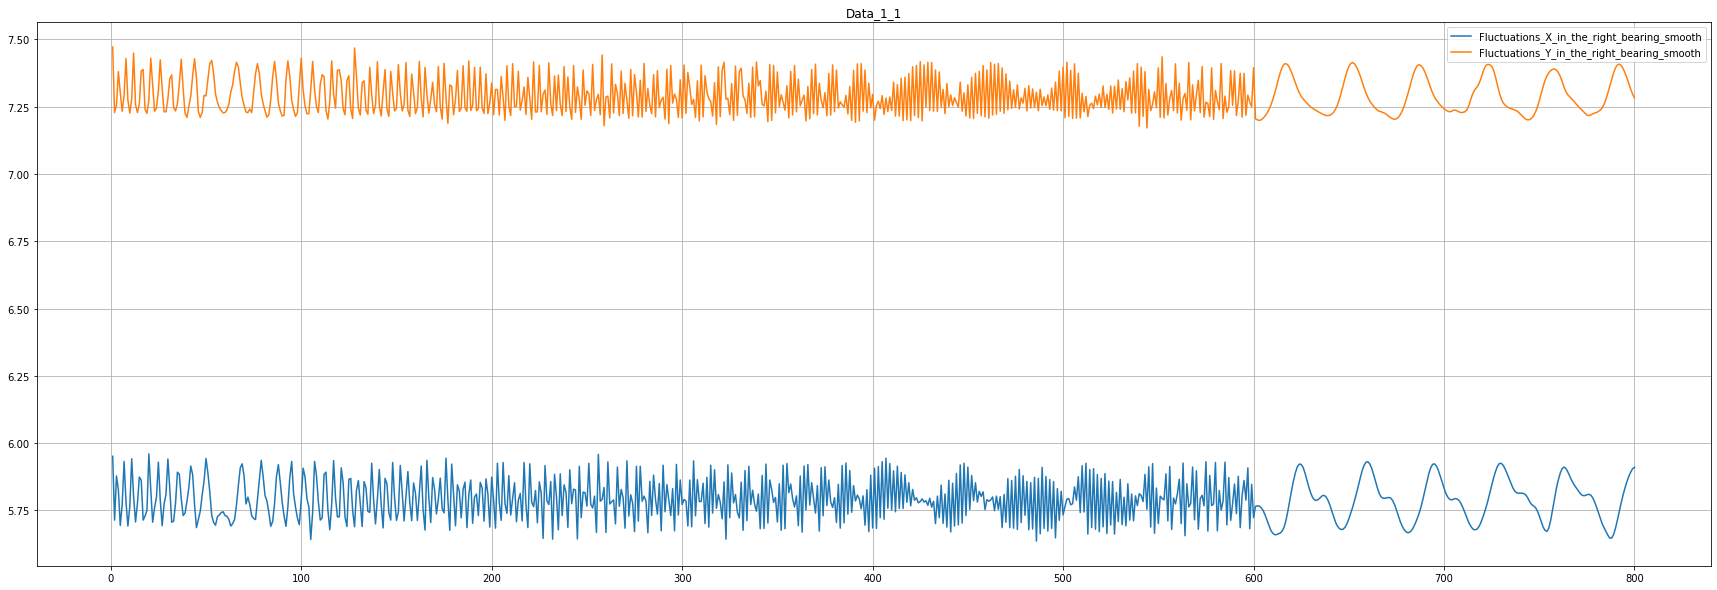

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df1['Fluctuations_X_in_the_right_bearing_smooth'][:800])+1))
plt.plot(num_elements, df1['Fluctuations_X_in_the_right_bearing_smooth'][:800], label='Fluctuations_X_in_the_right_bearing_smooth')
plt.plot(num_elements, df1['Fluctuations_Y_in_the_right_bearing_smooth'][:800], label='Fluctuations_Y_in_the_right_bearing_smooth')

plt.title('Data_1_1')
plt.grid(True)
plt.legend()

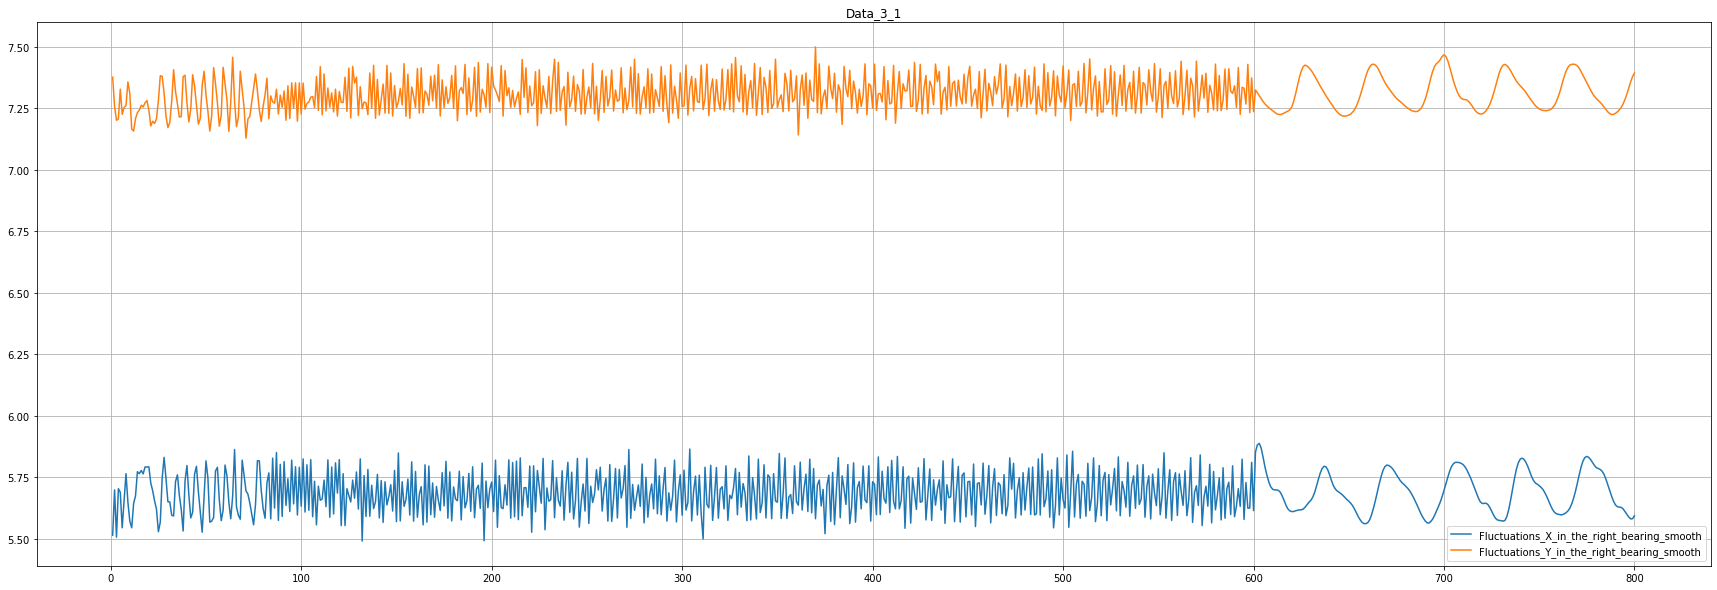

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df2['Fluctuations_X_in_the_right_bearing_smooth'][:800])+1))
plt.plot(num_elements, df2['Fluctuations_X_in_the_right_bearing_smooth'][:800], label='Fluctuations_X_in_the_right_bearing_smooth')
plt.plot(num_elements, df2['Fluctuations_Y_in_the_right_bearing_smooth'][:800], label='Fluctuations_Y_in_the_right_bearing_smooth')

plt.title('Data_3_1')
plt.grid(True)
plt.legend()

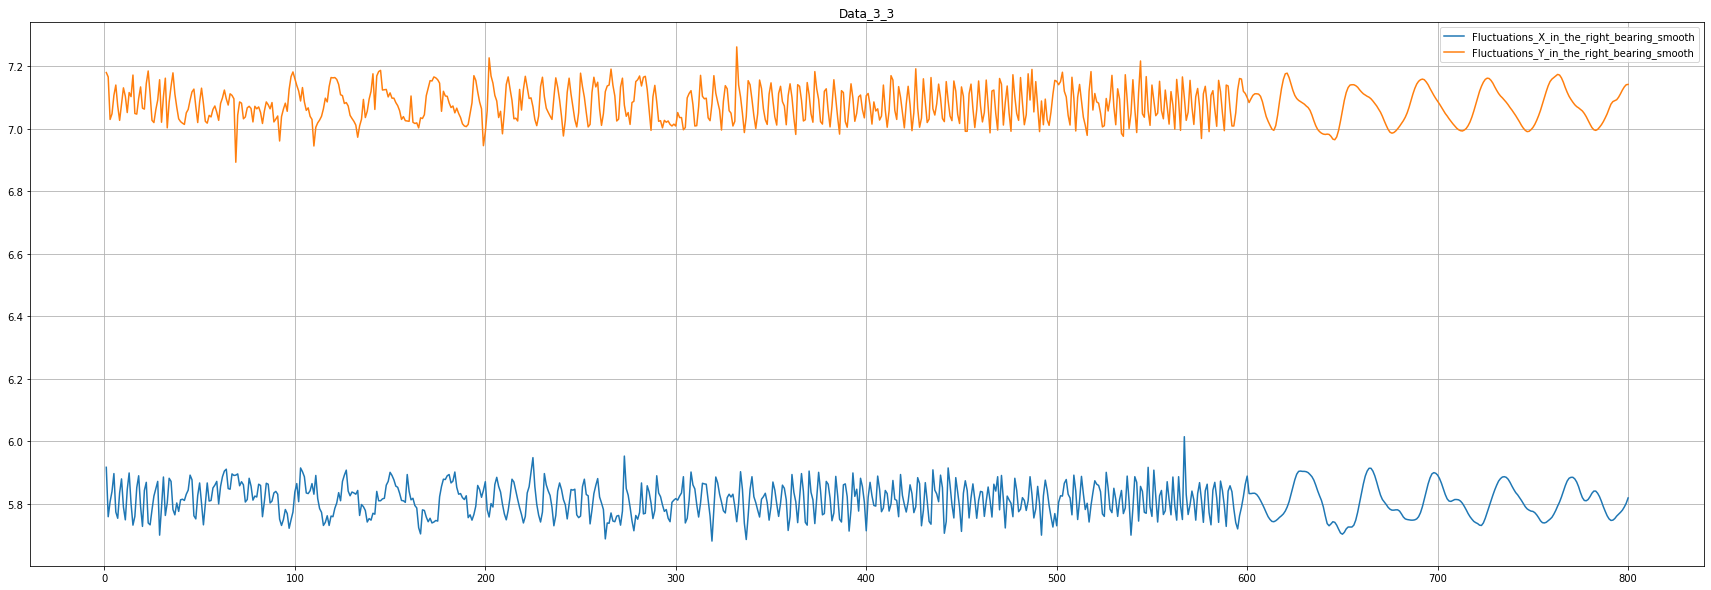

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df3['Fluctuations_X_in_the_right_bearing_smooth'][:800])+1))
plt.plot(num_elements, df3['Fluctuations_X_in_the_right_bearing_smooth'][:800], label='Fluctuations_X_in_the_right_bearing_smooth')
plt.plot(num_elements, df3['Fluctuations_Y_in_the_right_bearing_smooth'][:800], label='Fluctuations_Y_in_the_right_bearing_smooth')

plt.title('Data_3_3')
plt.grid(True)
plt.legend()

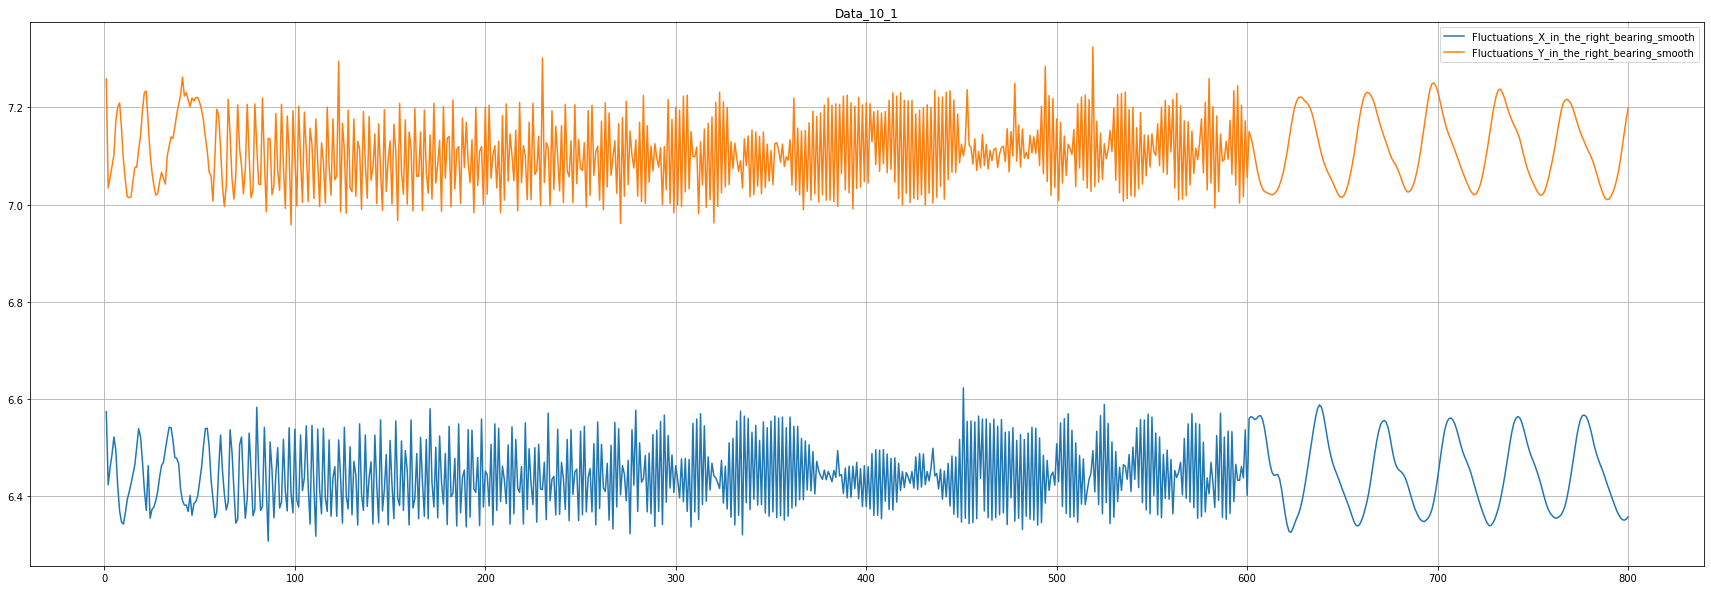

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df4['Fluctuations_X_in_the_right_bearing_smooth'][:800])+1))
plt.plot(num_elements, df4['Fluctuations_X_in_the_right_bearing_smooth'][:800], label='Fluctuations_X_in_the_right_bearing_smooth')
plt.plot(num_elements, df4['Fluctuations_Y_in_the_right_bearing_smooth'][:800], label='Fluctuations_Y_in_the_right_bearing_smooth')

plt.title('Data_10_1')
plt.grid(True)
plt.legend()

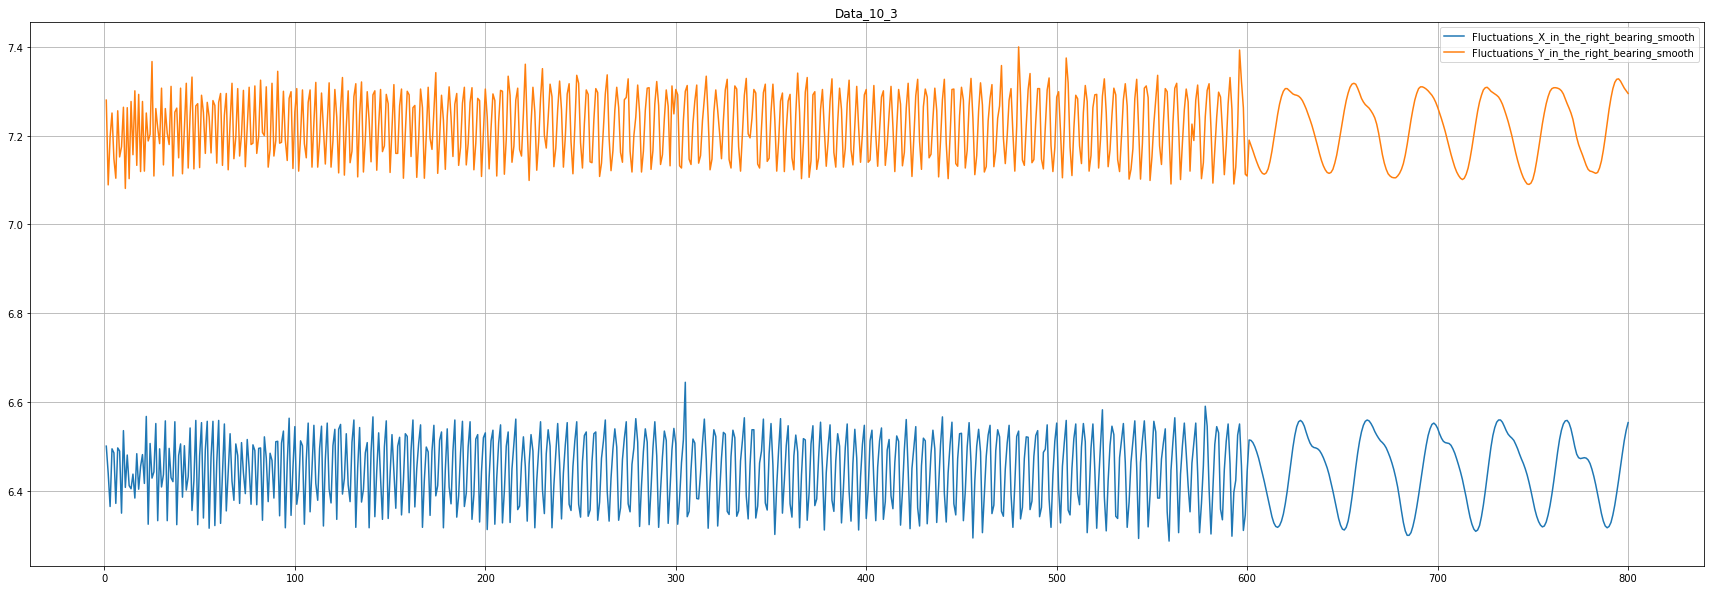

In [ ]:
plt.figure(figsize=(30, 10))
num_elements = list(range(1, len(df5['Fluctuations_X_in_the_right_bearing_smooth'][:800])+1))
plt.plot(num_elements, df5['Fluctuations_X_in_the_right_bearing_smooth'][:800], label='Fluctuations_X_in_the_right_bearing_smooth')
plt.plot(num_elements, df5['Fluctuations_Y_in_the_right_bearing_smooth'][:800], label='Fluctuations_Y_in_the_right_bearing_smooth')

plt.title('Data_10_3')
plt.grid(True)
plt.legend()

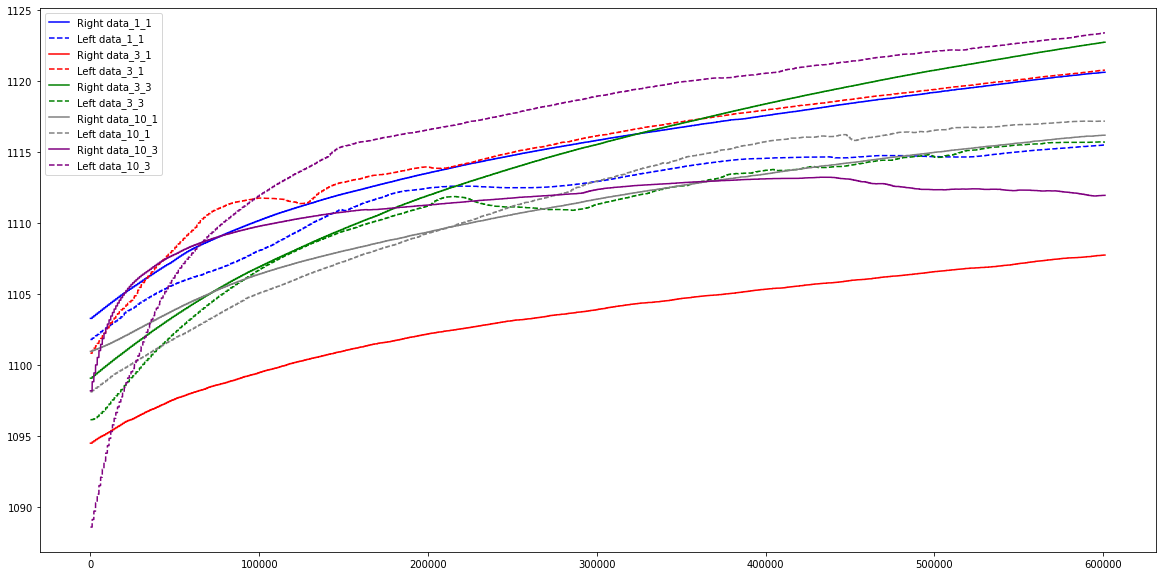

In [ ]:
plt.figure(figsize=(20, 10))
num_elements = list(range(1, len(df1['Temperature_in_the_right_bearing'])+1))

plt.plot(num_elements, df1['Temperature_in_the_right_bearing'], label='Right data_1_1', color='blue')
plt.plot(num_elements, df1['Temperature_in_the_left_bearing'], label='Left data_1_1', color='blue', linestyle='--')

plt.plot(num_elements, df2['Temperature_in_the_right_bearing'], label='Right data_3_1', color='red')
plt.plot(num_elements, df2['Temperature_in_the_left_bearing'], label='Left data_3_1', color='red', linestyle='--')

plt.plot(num_elements, df3['Temperature_in_the_right_bearing'], label='Right data_3_3', color='green')
plt.plot(num_elements, df3['Temperature_in_the_left_bearing'], label='Left data_3_3', color='green', linestyle='--')

plt.plot(num_elements, df4['Temperature_in_the_right_bearing'], label='Right data_10_1', color='gray')
plt.plot(num_elements, df4['Temperature_in_the_left_bearing'], label='Left data_10_1', color='gray', linestyle='--')

plt.plot(num_elements, df5['Temperature_in_the_right_bearing'], label='Right data_10_3', color='purple')
plt.plot(num_elements, df5['Temperature_in_the_left_bearing'], label='Left data_10_3', color='purple', linestyle='--')
plt.legend()